In [1]:
!wget -nc https://lazyprogrammer.me/course_files/sp500sub.csv

--2026-01-28 19:09:28--  https://lazyprogrammer.me/course_files/sp500sub.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25473876 (24M) [text/csv]
Saving to: ‘sp500sub.csv’

sp500sub.csv        100%[===================>]  24.29M  1.16MB/s    in 24s     

2026-01-28 19:09:54 (1.00 MB/s) - ‘sp500sub.csv’ saved [25473876/25473876]



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('sp500sub.csv', index_col='Date', parse_dates=True)
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Name'], dtype='object')

In [5]:
df['Name'].unique()

array(['INCY', 'GILD', 'DXC', 'AFL', 'XYL', 'ARE', 'AMD', 'WYNN', 'IBM',
       'ATVI', 'AES', 'GPC', 'PRU', 'HST', 'WMB', 'GOOG', 'SRE', 'HSIC',
       'UNP', 'UPS', 'K', 'LYB', 'MDT', 'COF', 'HAS', 'CSX', 'GT', 'SYF',
       'EBAY', 'KSS', 'AJG', 'JWN', 'SBUX', 'IT', 'PH', 'DVN', 'MMM',
       'SPG', 'AKAM', 'IP', 'CPB', 'KMI', 'AAPL', 'NEM', 'KMX', 'TSCO',
       'SYY', 'VNO', 'NWS', 'NBL', 'ACN', 'APH', 'PDCO', 'WLTW', 'FIS',
       'URI', 'CBOE', 'FISV', 'BA', 'UAA', 'CVS', 'WU', 'SLB', 'AIV',
       'VLO', 'MU', 'CAH', 'AZO', 'CCI', 'ZTS', 'MCO', 'ALLE', 'RHI',
       'UAL', 'IR', 'CB', 'VMC', 'GD', 'AAP', 'NEE', 'ABT', 'WFC', 'DIS',
       'SNA', 'MAR', 'JPM', 'CLX', 'KIM', 'SCG', 'HBI', 'ABBV', 'RSG',
       'ETR', 'ADBE', 'COO', 'HLT', 'INTU', 'SLG', 'GWW', 'COG', 'CBS',
       'FB', 'CMS', 'MDLZ'], dtype=object)

In [6]:
# names = df['Name'].unique()
names = ['GOOG', 'SBUX', 'KSS', 'NEM']

In [7]:
# 6 months of stocks
252/2

126.0

In [8]:
all_dates = df.index.unique().sort_values()

In [9]:
len(all_dates)

2267

In [10]:
all_dates.get_loc('2014-01-02')

1007

In [11]:
# Verify date exists
all_dates.get_loc('2014-06-30')

1130

In [12]:
start = all_dates.get_loc('2014-01-02')
end = all_dates.get_loc('2014-06-30')
dates = all_dates[start:end+1]

In [13]:
type(dates)

pandas.core.indexes.datetimes.DatetimeIndex

In [14]:
len(dates)

124

In [15]:
close_prices = pd.DataFrame(index=dates)
tmp1 = df.loc[dates]
for name in names:
  df_sym = tmp1[tmp1['Name'] == name]
  df_tmp = pd.DataFrame(data=df_sym['Close'].to_numpy(), \
                        index=df_sym.index, columns=[name])
  close_prices = close_prices.join(df_tmp) # left-join by default

In [16]:
close_prices.head()

,GOOG,SBUX,KSS,NEM
Date,,,,
2014-01-02,554.481689,38.584999,56.990002,23.959999
2014-01-03,550.436829,38.474998,56.860001,23.920000
2014-01-06,556.573853,38.084999,56.040001,24.080000
2014-01-07,567.303589,38.605000,56.099998,23.950001
2014-01-08,568.484192,39.014999,55.180000,23.400000


In [17]:
close_prices.isna().sum().sum()

np.int64(0)

In [18]:
# In case there was na values
close_prices.ffill(inplace=True)

In [19]:
# empty dataframe
returns = pd.DataFrame(index=dates[1:])

In [20]:
returns.head()

""
Date
2014-01-03
2014-01-06
2014-01-07
2014-01-08
2014-01-09


In [21]:
for name in names:
  current_returns = close_prices[name].pct_change()
  returns[name] = current_returns.iloc[1:] * 100

In [22]:
returns.head()

,GOOG,SBUX,KSS,NEM
Date,,,,
2014-01-03,-0.729485,-0.285086,-0.228112,-0.166941
2014-01-06,1.114937,-1.013644,-1.442138,0.668896
2014-01-07,1.927819,1.365368,0.107062,-0.539864
2014-01-08,0.208108,1.062038,-1.639925,-2.296456
2014-01-09,-0.962997,-0.551071,0.688657,-0.854696


In [23]:
mean_returns = returns.mean()
mean_returns

GOOG    0.038691
SBUX    0.009955
KSS    -0.053793
NEM     0.072932
dtype: float64

In [24]:
cov = returns.cov()
cov

,GOOG,SBUX,KSS,NEM
GOOG,2.206565,0.832469,0.771772,-0.033600
SBUX,0.832469,1.558406,0.714586,0.374448
KSS,0.771772,0.714586,2.025854,0.180308
NEM,-0.033600,0.374448,0.180308,4.815104


In [25]:
cov_np = cov.to_numpy()

In [26]:
mean_return = returns.mean()
mean_return

GOOG    0.038691
SBUX    0.009955
KSS    -0.053793
NEM     0.072932
dtype: float64

In [27]:
N = 10000
D = len(mean_return)
returns = np.zeros(N)
risks = np.zeros(N)
random_weights = []
for i in range(N):
  rand_range = 1.0
  w = np.random.random(D)*rand_range - rand_range / 2 # with short-selling
  w[-1] = 1 - w[:-1].sum()
  np.random.shuffle(w)
  random_weights.append(w)
  ret = mean_return.dot(w)
  risk = np.sqrt(w.dot(cov_np).dot(w))
  returns[i] = ret
  risks[i] = risk

In [28]:
returns

array([ 0.02820574,  0.01794874,  0.03751412, ..., -0.07521157,
        0.0314034 ,  0.09988297], shape=(10000,))

In [29]:
single_asset_returns = np.zeros(D)
single_asset_risks = np.zeros(D)
for i in range(D):
  ret = mean_return[i]
  risk = np.sqrt(cov_np[i,i])

  single_asset_returns[i] = ret
  single_asset_risks[i] = risk

/var/folders/mb/tkf0q4qs2n1f24l8b53m7jyh0000gn/T/ipykernel_41241/1335857300.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret = mean_return[i]


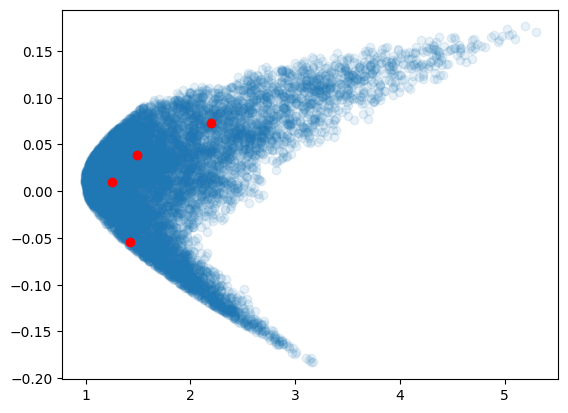

In [30]:
plt.scatter(risks, returns, alpha=0.1);
plt.scatter(single_asset_risks, single_asset_returns, c='red');

<span style="font-size:20pt; font-weight:600;">Max and Min Return</span>

In [31]:
from scipy.optimize import linprog

In [32]:
D = len(mean_return)

In [33]:
A_eq = np.ones((1, D))
b_eq = np.ones(1)

In [34]:
A_eq

array([[1., 1., 1., 1.]])

In [35]:
b_eq

array([1.])

In [36]:
### NOTE: The bounds are by default (0, None) unless otherwise specified.
# bounds = None
bounds = [(-0.5, None)]*D
bounds

[(-0.5, None), (-0.5, None), (-0.5, None), (-0.5, None)]

In [37]:
# minimize
res = linprog(mean_return, A_eq=A_eq, b_eq=b_eq, bounds=bounds)
res

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -0.19527252354831762
              x: [-5.000e-01 -5.000e-01  2.500e+00 -5.000e-01]
            nit: 0
          lower:  residual: [ 0.000e+00  0.000e+00  3.000e+00  0.000e+00]
                 marginals: [ 9.248e-02  6.375e-02  0.000e+00  1.267e-01]
          upper:  residual: [       inf        inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: [ 0.000e+00]
                 marginals: [-5.379e-02]
        ineqlin:  residual: []
                 marginals: []
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

In [38]:
min_return = res.fun

In [39]:
# maximize
res = linprog(-mean_return, A_eq=A_eq, b_eq=b_eq, bounds=bounds)
res

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -0.18490322425695216
              x: [-5.000e-01 -5.000e-01 -5.000e-01  2.500e+00]
            nit: 0
          lower:  residual: [ 0.000e+00  0.000e+00  0.000e+00  3.000e+00]
                 marginals: [ 3.424e-02  6.298e-02  1.267e-01  0.000e+00]
          upper:  residual: [       inf        inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: [ 0.000e+00]
                 marginals: [-7.293e-02]
        ineqlin:  residual: []
                 marginals: []
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

In [40]:
max_return = -res.fun

<span style="font-size:20pt; font-weight:600;">Mean-Variance Optimal Portfolios</span>

In [41]:
N = 100
target_returns = np.linspace(min_return, max_return, num=N)

In [42]:
from scipy.optimize import minimize

In [43]:
def get_portfolio_variance(weights):
  return weights.dot(cov).dot(weights)

In [44]:
# Should return 0 when the constraints is met
# Here, sum of the weights * returns = target return
def target_return_constraint(weights, target):
  return weights.dot(mean_return) - target

In [45]:
# Sum of the weights = 1 (returns 0)
def portfolio_constraint(weights):
  return weights.sum() - 1

In [46]:
constraints = [
    {
        'type': 'eq',  # Should return 0 when constraint is met
        'fun': target_return_constraint,
        'args': [target_returns[0]], # will be updated in loop
    },
    {
        'type': 'eq',
        'fun': portfolio_constraint,
    }
]

In [47]:
# check if it works
res = minimize(
    fun=get_portfolio_variance,
    x0=np.ones(D) / D, # uniform
    method='SLSQP',
    constraints=constraints,
)
res

     message: Optimization terminated successfully
     success: True
      status: 0
         fun: 10.284419897920834
           x: [-1.040e+00  2.802e-01  2.258e+00 -4.982e-01]
         nit: 8
         jac: [-6.050e-01  1.996e+00  7.765e+00 -3.704e+00]
        nfev: 42
        njev: 8
 multipliers: [-9.050e+01  2.897e+00]

In [48]:
# check if it works
res = minimize(
    fun=get_portfolio_variance,
    x0=np.ones(D) / D, # uniform
    method='SLSQP',
    constraints=constraints,
    bounds=bounds,
)
res

     message: Optimization terminated successfully
     success: True
      status: 0
         fun: 11.226599298037828
           x: [-5.000e-01 -5.000e-01  2.500e+00 -5.000e-01]
         nit: 4
         jac: [ 8.534e-01  8.076e-01  8.463e+00 -4.254e+00]
        nfev: 21
        njev: 4
 multipliers: [-1.201e+02  2.003e+00]

In [49]:
# Create oour Efficient Frontier
optimized_risks = []
for target in target_returns:
  # set target return constraint
  constraints[0]['args'] = [target]

  res = minimize(
      fun=get_portfolio_variance,
      x0=np.ones(D) / D, # uniform
      method='SLSQP',
      constraints=constraints,
      bounds=bounds,
  )
  optimized_risks.append(np.sqrt(res.fun))
  if res.status != 0:
    print(res)

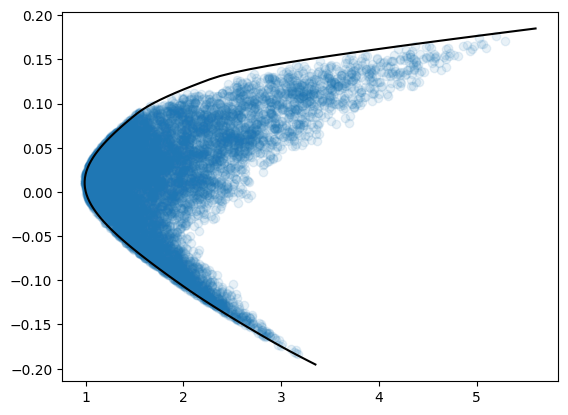

In [50]:
plt.scatter(risks, returns, alpha=0.1);
plt.plot(optimized_risks, target_returns, c='black');

In [51]:
# Min variance portfolio
# Let's limit the magnitude of the weights
res = minimize(
    fun=get_portfolio_variance,
    x0=np.ones(D) / D, # uniform
    method='SLSQP',
    constraints={
        'type': 'eq',
        'fun': portfolio_constraint,
    },
    bounds=bounds,
)
res

     message: Optimization terminated successfully
     success: True
      status: 0
         fun: 0.9782928256403252
           x: [ 2.234e-01  3.490e-01  2.598e-01  1.679e-01]
         nit: 4
         jac: [ 1.957e+00  1.957e+00  1.957e+00  1.957e+00]
        nfev: 23
        njev: 4
 multipliers: [ 1.957e+00]

In [52]:
mv_risk = np.sqrt(res.fun)
mv_weights = res.x
mv_ret = mv_weights.dot(mean_return)

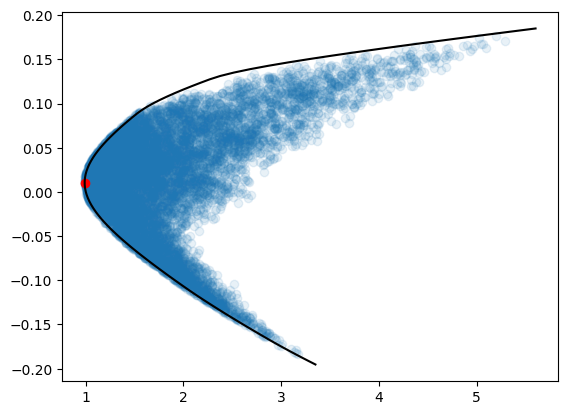

In [53]:
plt.scatter(risks, returns, alpha=0.1);
plt.plot(optimized_risks, target_returns, c='black');
plt.scatter([mv_risk], [mv_ret], c='red');

<span style="font-size:20pt; font-weight:600;">Sharpe Ratio</span>

In [54]:
# https://fred.stlouisfed.org/series/TB3MS
risk_free_rate = 0.03 / 252

In [55]:
def neg_sharpe_ratio(weights):
  mean = weights.dot(mean_return)
  sd = np.sqrt(weights.dot(cov).dot(weights))
  # Return '-' as we want to maximize - i.e. - minimum
  return -(mean - risk_free_rate) / sd

In [56]:
res = minimize(
    fun=neg_sharpe_ratio,
    x0=np.ones(D) / D, # uniform
    method='SLSQP',
    constraints={
        'type': 'eq',
        'fun': portfolio_constraint,
    },
    bounds=bounds,
)
res

     message: Optimization terminated successfully
     success: True
      status: 0
         fun: -0.05920759738151394
           x: [ 8.422e-01  1.183e-01 -5.000e-01  5.394e-01]
         nit: 16
         jac: [ 9.372e-03  9.290e-03  2.812e-02  9.263e-03]
        nfev: 80
        njev: 16
 multipliers: [ 9.330e-03]

In [57]:
best_sr, best_w = -res.fun, res.x

In [58]:
# Monte Carlo approach

In [59]:
mc_best_w = None
mc_best_sr = float('-inf')
for i, (risk, ret) in enumerate(zip(risks, returns)):
  sr = (ret - risk_free_rate) / risk
  if sr > mc_best_sr:
    mc_best_sr = sr
    mc_best_w = random_weights[i]
print(mc_best_w, mc_best_sr)

[ 0.92430092  0.10851945 -0.49650084  0.46368047] 0.05868990968754174


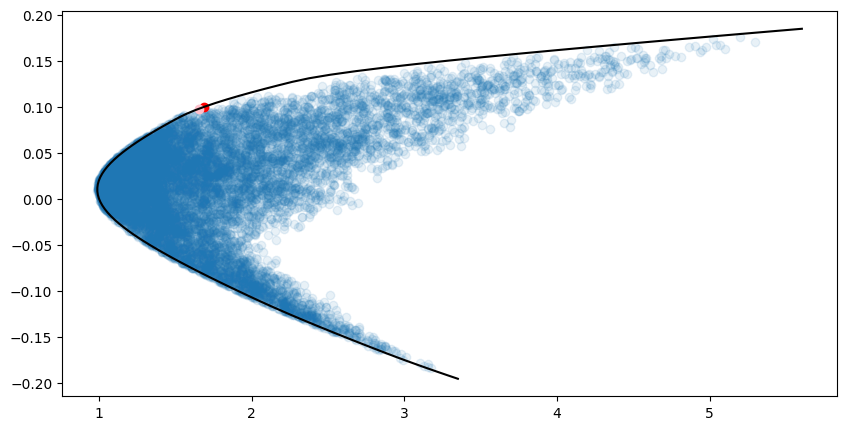

In [60]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(risks, returns, alpha=0.1);
plt.plot(optimized_risks, target_returns, c='black');

# found by optimization
opt_risk = np.sqrt(best_w.dot(cov).dot(best_w))
opt_ret = mean_return.dot(best_w)
plt.scatter([opt_risk], [opt_ret], c='red');

# found by monte carlo simulation
mc_risk = np.sqrt(mc_best_w.dot(cov).dot(mc_best_w))
mc_ret = mean_return.dot(mc_best_w)
plt.scatter([mc_risk], [mc_ret], c='pink');

<span style="font-size:20pt; font-weight:600;">Risk-free asset with tangency portfolio</span>

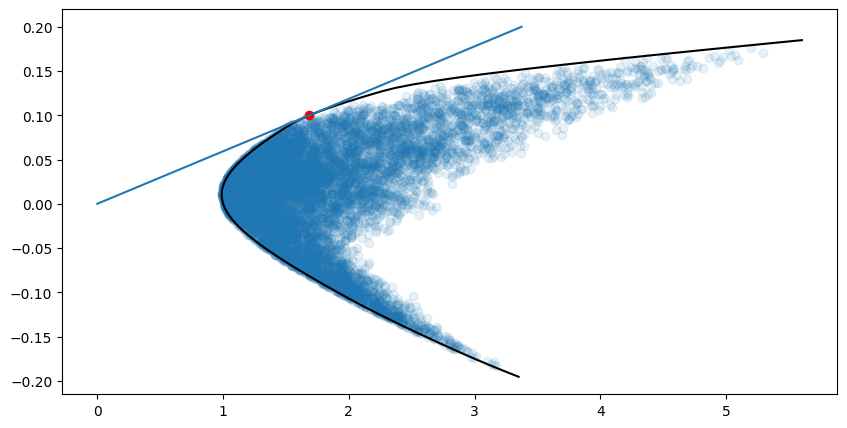

In [62]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(risks, returns, alpha=0.1);
plt.plot(optimized_risks, target_returns, c='black');

# found by optimization
opt_risk = np.sqrt(best_w.dot(cov).dot(best_w))
opt_ret = mean_return.dot(best_w)
plt.scatter([opt_risk], [opt_ret], c='red');

# tangent line
x1 = 0
y1 = risk_free_rate
x2 = 2*opt_risk
y2 = 2*opt_ret
plt.plot([x1, x2], [y1, y2]);